In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\alpes\OneDrive\Desktop\Delhi's Climate Data Analysis\data\processed\monthly_avg_aqi.csv")
df.head()

,Year,Month,AQI
0,2017,January,305.066667
1,2017,February,259.714286
2,2017,March,190.551724
3,2017,April,212.586207
4,2017,May,236.548387


In [2]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    100 non-null    int64  
 1   Month   100 non-null    object 
 2   AQI     100 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


Year     0
Month    0
AQI      0
dtype: int64

In [5]:
print("AQI Summary:")
print(df['AQI'].describe())  # Replace 'AQI' with actual column name


AQI Summary:
count    100.000000
mean     198.765221
std       83.991539
min       63.870968
25%      122.125000
50%      193.146753
75%      266.298387
max      368.366667
Name: AQI, dtype: float64


In [6]:
import calendar

# Create Date column for time-based plotting
df['Month_Num'] = df['Month'].apply(lambda x: list(calendar.month_name).index(x))
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month_Num'].astype(str), format='%Y-%m')

# Optional: ensure correct sort order
df.sort_values(by='Date', inplace=True)


Even if you don’t have day-level data, it’s good practice to create a Date column like Above, it assign the first day for each months

In [7]:
df.head()

,Year,Month,AQI,Month_Num,Date
0,2017,January,305.066667,1,2017-01-01
1,2017,February,259.714286,2,2017-02-01
2,2017,March,190.551724,3,2017-03-01
3,2017,April,212.586207,4,2017-04-01
4,2017,May,236.548387,5,2017-05-01


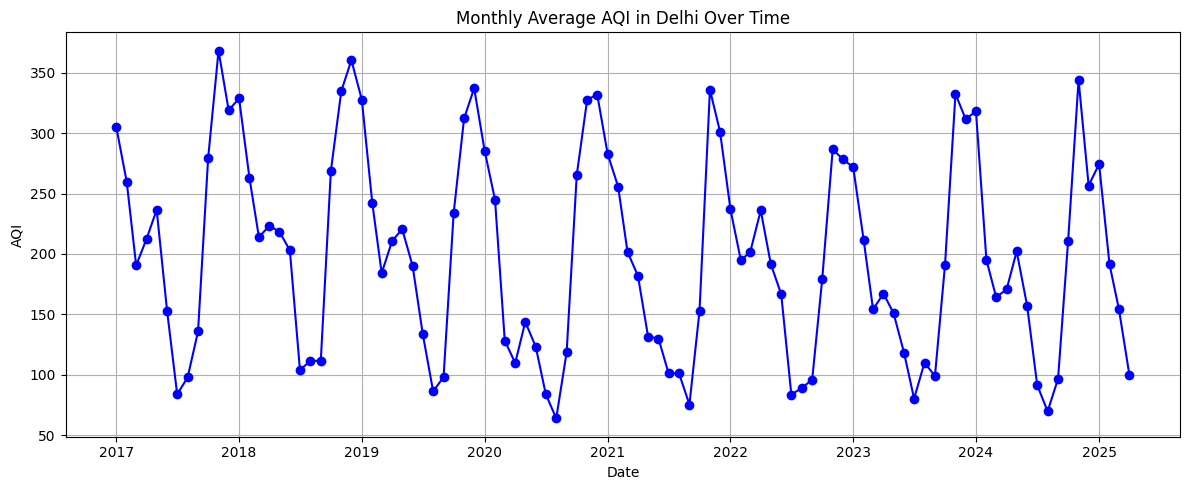

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['AQI'], marker='o', linestyle='-', color='blue')
plt.title('Monthly Average AQI in Delhi Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(True)
plt.tight_layout()
plt.show()


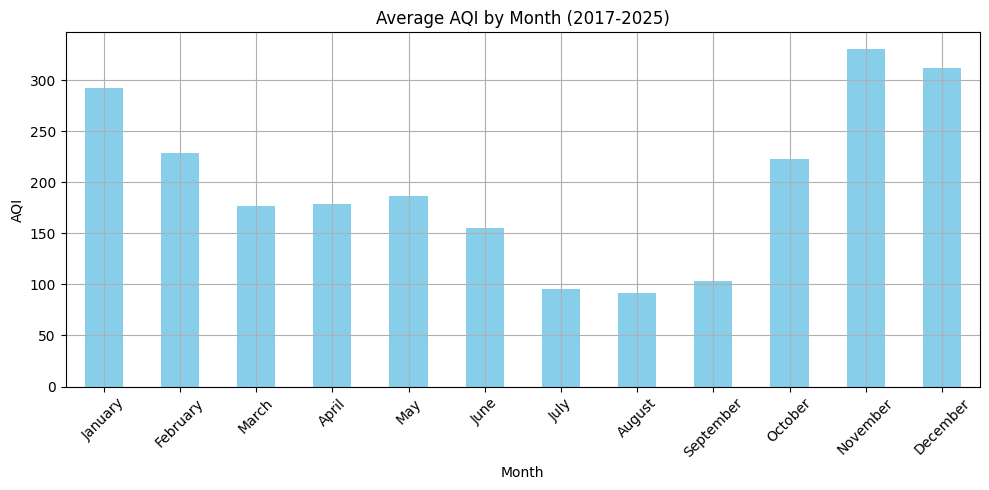

In [10]:
import seaborn as sns

# Average AQI by month across all years
month_order = list(calendar.month_name)[1:]  # Jan to Dec
monthly_avg = df.groupby('Month')['AQI'].mean().reindex(month_order)

monthly_avg.plot(kind='bar', color='skyblue', figsize=(10, 5))
plt.title('Average AQI by Month (2017-2025)')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


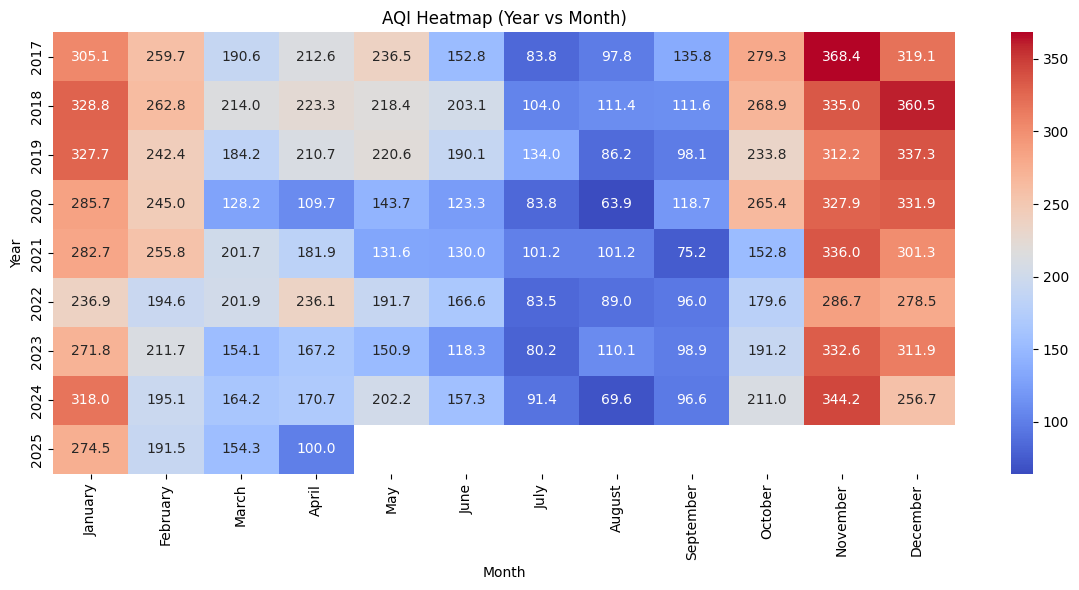

In [11]:
pivot = df.pivot(index='Year', columns='Month', values='AQI').reindex(columns=month_order)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('AQI Heatmap (Year vs Month)')
plt.tight_layout()
plt.show()


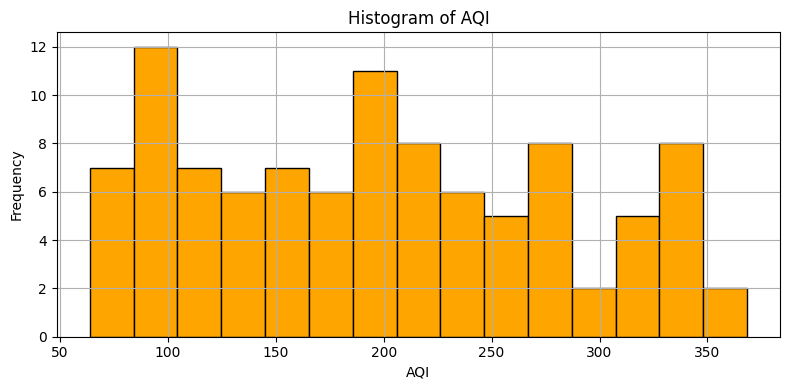

In [12]:
plt.figure(figsize=(8, 4))
plt.hist(df['AQI'], bins=15, color='orange', edgecolor='black')
plt.title('Histogram of AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()
